In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
from konlpy.tag import Kkma
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm

## 데이터 탐색

In [2]:
news1 = pd.read_csv("data/2020.01.01_2020.12.31_1.csv")
news1.head(10)

,0
0,"은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영"
1,새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다
2,반려식물로 코로나 우울 해소
3,"“우리 아이와 반려동물, 함께 생활해도 괜찮을까?”"
4,"[영상]반려동물 식품의 세계화 ""정부지원 받아 글로벌기업으로 우뚝"""
5,배스 사들여 반려동물식품 제조…빈집 고쳐 장기거주 사회주택 제공
6,"반려동물도 코로나블루? 쿠쿠전자 넬로, 팻케어 제품 수요 증가"
7,2021년부터 동물보호법 상 맹견은 책임보험 의무화
8,[웰컴 투 펫팸] 반려동물도 쇼크로 쓰러진다
9,"지솔펫, 반려동물을 위한 살균·소독·향균 탈취제 선보여"


In [3]:
news2 = pd.read_csv("data/2021.01.01_2021.12.31_1.csv")
news2.head(10)

,0
0,이재명 코로나 거점 전담병원 방문…‘반려동물’ 유튜브 출연
1,반려동물 함께 즐기는 스타벅스 더북한강R 점 오픈
2,"잔인한 방법으로 개 도살, 허가 없이 번식도…동물 학대 적발"
3,"반려동물도 코로나 감염…""확진자 재택치료시 분리해야"""
4,올해 최다 이용 반려동물 앱 1위는 펫프렌즈
5,반려동물은 제2의 고객… 펫팸족 공략나선 LCC
6,‘면적 제한 폐지’ 농지원부 작성 의무화... 동물보건사 자격제도 시행
7,"울산 남구, 반려동물정책계·치매관리계 신설…조직개편 단행"
8,"허은아 ""이재명, 반려견 '이행복'은 어디에..동물에 대한 애정 없어"""
9,스파이더맨 보러 간 영화관 팝콘 속에서 나온 '햄스터' 반려동물로 입양한 소...


In [4]:
news3 = pd.read_csv("data/2022.01.01_2022.12.25_1.csv")
news3.head(10)

,0
0,"尹대통령, 은퇴 안내견 입양…관저에 11번째 동물 식구(종합)"
1,"윤 대통령 부부, 은퇴 안내견 '새롬이' 입양… 11번째 반려동물"
2,[영상]부산 1호 반려동물 테마파크...주민들이 반대하는 이유
3,[정치톡톡] 정치권 성탄 메시지 / '민주당의 길' 출범 / 대통령 11번째 반려동...
4,'동물복지 조례·보호센터 직영 운영'…사람과 동물이 행복한 고양시
5,'TV동물농장' 뒷다리 마비 웰시코기 '장수'
6,경기도반려동물테마파크의 배신?… 지원시설 빼고 추모관뿐
7,"볼보자동차, 서울시에 반려동물 물품 5천만원 상당 기부"
8,"서울시, 반려동물 '사료검정기관' 지정…전국 지자체 중 최초"
9,삶이 위태로운 야생동물의 똥이 우리에게 하는 말 [반려인의 오후]


In [5]:
kipris = pd.read_csv("data/kipris.csv")
kipris.head(5)

,대표도면,출원번호,발명의명칭,발명의명칭(영문),상태,IPC분류,출원인,대리인,발명자,출원일자,등록번호,등록일자,공개번호,공개일자
0,NaN,1020210147821,반려동물용 항산화 보조제 및 그 제조 방법(antioxidant supplement...,antioxidant supplements for companion animal a...,등록,A23K 20/10|A23K 50/40|A61K 9/48|A23K 20/158|A2...,(주)한국반려동물영양연구소,문춘오,정설령,2021.11.01,1.024582e+12,2022.10.19,NaN,NaN
1,NaN,1020190100688,스마트폰을 이용한 반려동물 미용샵 예약관리 시스템 및 방법(RESERVATION S...,RESERVATION SYSTEM AND METHOD FOR A PET BEAUTY...,거절,G06Q 50/10|G06Q 10/02|G06Q 30/02|G06Q 50/30|G0...,주식회사 펫미,우정연,백영호,2019.08.18,NaN,NaN,1.020210e+12,2021.02.26
2,NaN,1020200081386,"반려동물의 3D 복원 및 감정 분석을 통한 컨텐츠 제공 서버, 사용자 단말 및 그 ...",SERVER AND USER EQUIPMENT FOR PROVIDING CONTEN...,등록,G06T 7/55|G06T 7/194|G06T 13/40|G06T 11/60|G06...,주식회사 엘지유플러스,특허법인 무한,유한규,2020.07.02,1.024808e+12,2022.12.20,1.020220e+12,2022.01.11
3,NaN,1020210044524,딥러닝을 이용한 반려동물 질환 추론 모듈 및 전자 장치(A method and el...,A method and electronic device for distinguish...,공개,G16H 50/70|G16H 50/20|G16H 30/40|G16H 30/20|G0...,주식회사 알파도,박수영,지영호,2021.04.06,NaN,NaN,1.020220e+12,2022.10.14
4,NaN,1020220060339,스마트 반려동물 배변패드 처리장치(Smart companion animal defe...,Smart companion animal defecation pad disposal...,등록,A01K 1/01|A01K 23/00,충북대학교 산학협력단,김정현,이아연|구승회,2022.05.17,1.024807e+12,2022.12.20,NaN,NaN


In [6]:
news1.shape, news2.shape, news3.shape, kipris.shape

((4000, 1), (4000, 1), (4000, 1), (7481, 14))

In [7]:
news1.describe()

,0
count,4000
unique,2850
top,반려동물과 오랫동안 행복하게! '화묘도 花猫圖 꽃과 고양이 그림 달력' 텀블...
freq,8


In [8]:
news2.describe()

,0
count,4000
unique,2816
top,"JW생활건강, 반려동물 영양제 브랜드 '라보펫' 론칭"
freq,12


In [9]:
news3.describe()

,0
count,4000
unique,2852
top,"우리은행, 반려동물 콘테스트 개최"
freq,14


In [10]:
kipris.describe(include= "object")

,발명의명칭,발명의명칭(영문),상태,IPC분류,출원인,대리인,발명자,출원일자,등록일자,공개일자
count,7481,7469,7481,7481,7481,6971,7481,7481,3140,6361
unique,6641,6467,6,6330,4001,1065,5806,2813,1603,2365
top,반려동물 급수기(Water supply device for pets),Water supply device for pets,등록,A01K 15/02,엘지전자 주식회사,양영준|김영,유현선|김성경|김주겸|전재흥,2021.02.06,2018.08.02,2020.03.27
freq,23,23,2749,50,167,348,24,18,12,65


## 데이터 전처리

### 중복값 제거

In [11]:
news_2020 = news1.drop_duplicates()["0"]
news_2021 = news2.drop_duplicates()["0"]
news_2022 = news3.drop_duplicates()["0"]

In [12]:
kipris_name = kipris.loc[kipris["상태"]!="거절"]["발명의명칭"].drop_duplicates()

In [13]:
news_2020.shape, news_2021.shape, news_2022.shape, kipris_name.shape

((2850,), (2816,), (2852,), (5702,))

In [14]:
news_2020[0:10]

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_13244/3649413601.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  news_2020[0:10]


0               은평구, 반려동물 문화교실 '댕댕이 스쿨' 운영
1        새해부터 반려동물 미용사·나무의사도 신중년 고용장려금 받는다
2                          반려식물로 코로나 우울 해소
3             “우리 아이와 반려동물, 함께 생활해도 괜찮을까?”
4    [영상]반려동물 식품의 세계화 "정부지원 받아 글로벌기업으로 우뚝"
5      배스 사들여 반려동물식품 제조…빈집 고쳐 장기거주 사회주택 제공
6       반려동물도 코로나블루? 쿠쿠전자 넬로, 팻케어 제품 수요 증가
7             2021년부터 동물보호법 상 맹견은 책임보험 의무화
8                 [웰컴 투 펫팸] 반려동물도 쇼크로 쓰러진다
9           지솔펫, 반려동물을 위한 살균·소독·향균 탈취제 선보여
Name: 0, dtype: object

In [15]:
kipris_name

0       반려동물용 항산화 보조제 및 그 제조 방법(antioxidant supplement...
2       반려동물의 3D 복원 및 감정 분석을 통한 컨텐츠 제공 서버, 사용자 단말 및 그 ...
3       딥러닝을 이용한 반려동물 질환 추론 모듈 및 전자 장치(A method and el...
4       스마트 반려동물 배변패드 처리장치(Smart companion animal defe...
5       반려동물 위생 및 건강관리 기기장치(Sanitary Management and He...
                              ...                        
7474    펫 금융 계좌를 이용한 펫 금융 서비스 제공 장치 및 그 동작 방법(A pet fi...
7476    맞춤형 추천 서비스를 제공하는 온라인 판매 방법(ONLINE SELLING METH...
7477          자동 물내림 장치(Automatic toilet flushing device)
7479    애완동물 리드줄 제어장치 및 방법(Method and Apparatus for co...
7480    애완동물 커뮤니티 서비스를 제공하는 장치 및 방법(APPARATUS AND METH...
Name: 발명의명칭, Length: 5702, dtype: object

### 한글 외 문자 제거

In [16]:
# 정규 표현식을 통한 한글 외 문자 제거
news_2020 = news_2020.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
news_2021 = news_2021.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
news_2022 = news_2022.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
kipris_name = kipris_name.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_13244/483319697.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  news_2020 = news_2020.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_13244/483319697.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  news_2021 = news_2021.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_13244/483319697.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  news_2022 = news_2022.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_13244/483319697.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  kipris_name = kipris_name.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [17]:
news_2020[0:10]

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_13244/3649413601.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  news_2020[0:10]


0               은평구 반려동물 문화교실 댕댕이 스쿨 운영
1      새해부터 반려동물 미용사나무의사도 신중년 고용장려금 받는다
2                       반려식물로 코로나 우울 해소
3              우리 아이와 반려동물 함께 생활해도 괜찮을까
4     영상반려동물 식품의 세계화 정부지원 받아 글로벌기업으로 우뚝
5    배스 사들여 반려동물식품 제조빈집 고쳐 장기거주 사회주택 제공
6      반려동물도 코로나블루 쿠쿠전자 넬로 팻케어 제품 수요 증가
7              년부터 동물보호법 상 맹견은 책임보험 의무화
8                웰컴 투 펫팸 반려동물도 쇼크로 쓰러진다
9           지솔펫 반려동물을 위한 살균소독향균 탈취제 선보여
Name: 0, dtype: object

In [18]:
kipris_name[0:10]

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_13244/1549287818.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  kipris_name[0:10]


0                       반려동물용 항산화 보조제 및 그 제조 방법        
2     반려동물의  복원 및 감정 분석을 통한 컨텐츠 제공 서버 사용자 단말 및 그 방법 ...
3              딥러닝을 이용한 반려동물 질환 추론 모듈 및 전자 장치          
4                              스마트 반려동물 배변패드 처리장치      
5                           반려동물 위생 및 건강관리 기기장치        
6                       반려동물의 심리 및 성격유형검사 제공시스템        
7                               반려동물 자동 배변 밀폐 처리장치     
9                        반려동물 질병 추론 시스템 및 그 방법         
10    광용적맥파를 이용한 반려동물 응급상황 모니터링 시스템 및 이의 동작 방법      ...
11    반려동물 의료데이터 표준화 방법 및 장치 그리고 이를 이용한 반려동물 질병 발생 예...
Name: 발명의명칭, dtype: object

## Tokenizer

In [19]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '및', '그', '방법', '년부터']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_2020 = []
for sentence in tqdm(news_2020):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_2020.append(stopwords_removed_sentence)

100%|██████████| 2850/2850 [00:03<00:00, 759.37it/s] 


In [20]:
tokenized_2021 = []
for sentence in tqdm(news_2021):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_2021.append(stopwords_removed_sentence)

100%|██████████| 2816/2816 [00:01<00:00, 1507.37it/s]


In [21]:
tokenized_2022 = []
for sentence in tqdm(news_2022):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_2022.append(stopwords_removed_sentence)

100%|██████████| 2852/2852 [00:02<00:00, 1339.83it/s]


기사의 최대 길이 : 16
기사의 평균 길이 : 9.469122807017543


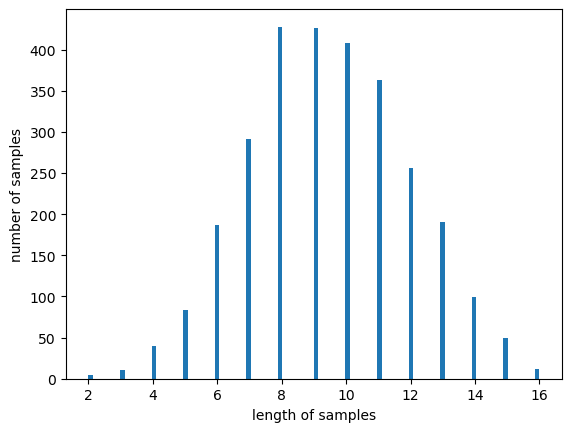

In [22]:
print('기사의 최대 길이 :',max(len(article) for article in tokenized_2020))
print('기사의 평균 길이 :',sum(map(len, tokenized_2020))/len(tokenized_2020))
plt.hist([len(article) for article in tokenized_2020], bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [23]:
# 단어 집합(Vocabulary)을 만들기 위해서 문장의 경계인 [, ]를 제거하고 단어들을 하나의 리스트로 만든다.
vocab_2020 = sum(tokenized_2020, [])
print(vocab_2020[:10])

['은평구', '반려동물', '문화', '교실', '댕댕', '스쿨', '운영', '새해', '부터', '반려동물']


In [24]:
vocab_2021 = sum(tokenized_2021, [])
print(vocab_2021[:10])

['이재명', '코로나', '거점', '전담', '병원', '방문', '반려동물', '유튜브', '출연', '반려동물']


In [25]:
vocab_2022 = sum(tokenized_2022, [])
print(vocab_2022[:10])

['대통령', '은퇴', '안내견', '입양', '관저', '번째', '동물', '식구', '종합', '윤']


### 빈도 수 분석

In [26]:
from collections import Counter
def top_20_words(tokens):
    word_counts = Counter(tokens)
    return word_counts.most_common(20)

In [27]:
top_20_words(vocab_2020)

[('반려동물', 2261),
 ('펫', 337),
 ('동물', 180),
 ('반려', 159),
 ('위', 152),
 ('문화', 135),
 ('건강', 133),
 ('센터', 122),
 ('출시', 119),
 ('로', 116),
 ('코로나', 112),
 ('비', 111),
 ('을', 106),
 ('서비스', 104),
 ('강아지', 101),
 ('제', 100),
 ('무료', 99),
 ('개', 96),
 ('고양이', 94),
 ('분양', 94)]

In [28]:
top_20_words(vocab_2021)

[('반려동물', 2073),
 ('펫', 276),
 ('동물', 244),
 ('대', 173),
 ('반려', 155),
 ('위', 145),
 ('건강', 129),
 ('로', 126),
 ('문화', 124),
 ('센터', 121),
 ('함께', 103),
 ('년', 99),
 ('개', 96),
 ('을', 92),
 ('시장', 89),
 ('산업', 88),
 ('이야기', 85),
 ('등록', 82),
 ('화', 81),
 ('만', 80)]

In [29]:
top_20_words(vocab_2022)

[('반려동물', 2284),
 ('펫', 338),
 ('동물', 303),
 ('문화', 206),
 ('반려', 156),
 ('개최', 137),
 ('위', 130),
 ('센터', 126),
 ('함께', 120),
 ('동물복지', 116),
 ('지원', 115),
 ('제', 115),
 ('대상', 113),
 ('출시', 112),
 ('로', 110),
 ('대', 110),
 ('건강', 103),
 ('비', 101),
 ('을', 99),
 ('산업', 95)]

In [30]:
# 명사만 추출해보자
# nouns라는 편리한 함수가 있으니 명사 빈도 계산은 코드 몇줄이면 끝난다. 
#출처: https://liveyourit.tistory.com/57

# "phrase input should be string, not <class 'list'>" 에러 해결해주기 위해 넣었습니다.
phrase_string = " ".join(vocab_2020)

# okt 객체 생성
okt = Okt()
noun = okt.nouns(phrase_string)
for i,v in enumerate(noun):
	if len(v)<2:
		noun.pop(i)
count = Counter(noun)
	

# 명사 빈도 카운트
noun_list = count.most_common(50)
for v in noun_list:
	print(v)

('반려동물', 2261)
('동물', 180)
('반려', 159)
('문화', 135)
('건강', 133)
('센터', 122)
('출시', 119)
('코로나', 112)
('서비스', 104)
('강아지', 101)
('무료', 99)
('고양이', 94)
('분양', 94)
('진료', 90)
('입양', 80)
('지원', 78)
('온라인', 77)
('한국', 76)
('개최', 76)
('자격증', 75)
('산업', 74)
('유기동물', 73)
('용품', 71)
('관리사', 71)
('대상', 70)
('경기도', 70)
('동물농장', 68)
('케어', 67)
('보호', 67)
('진행', 67)
('경남', 67)
('이야기', 66)
('시장', 65)
('전문', 65)
('이벤트', 64)
('사료', 64)
('보험', 62)
('동물병원', 61)
('브랜드', 61)
('시대', 61)
('사회', 57)
('기업', 54)
('펫시터', 51)
('수강', 51)
('반려견', 50)
('부터', 49)
('진흥', 48)
('실시', 48)
('놀이터', 48)
('운영', 47)


In [31]:
phrase_string = " ".join(vocab_2021)

# okt 객체 생성
okt = Okt()
noun = okt.nouns(phrase_string)
for i,v in enumerate(noun):
	if len(v)<2:
		noun.pop(i)
count = Counter(noun)
	

# 명사 빈도 카운트
noun_list = count.most_common(50)
for v in noun_list:
	print(v)

('반려동물', 2073)
('동물', 244)
('반려', 155)
('건강', 129)
('문화', 124)
('센터', 121)
('시장', 89)
('산업', 88)
('이야기', 85)
('등록', 82)
('출시', 79)
('지원', 72)
('보건', 71)
('플랫폼', 68)
('브랜드', 67)
('개최', 67)
('동물병원', 66)
('진료', 65)
('파크', 65)
('사랑', 64)
('대상', 61)
('사업', 60)
('고양이', 60)
('사료', 59)
('투자', 57)
('기업', 57)
('케어', 56)
('생활', 54)
('테마', 54)
('오픈', 53)
('전용', 52)
('의원', 52)
('코로나', 50)
('최초', 49)
('입양', 48)
('개발', 48)
('공개', 48)
('학교', 48)
('유기동물', 46)
('진행', 46)
('운영', 44)
('펫', 44)
('양성', 44)
('선정', 43)
('보호', 43)
('캠페인', 43)
('부산', 43)
('서울', 43)
('개장', 43)
('동반', 42)


In [32]:
phrase_string = " ".join(vocab_2022)

# okt 객체 생성
okt = Okt()
noun = okt.nouns(phrase_string)
for i,v in enumerate(noun):
	if len(v)<2:
		noun.pop(i)
count = Counter(noun)
	

# 명사 빈도 카운트
noun_list = count.most_common(50)
for v in noun_list:
	print(v)

('반려동물', 2284)
('동물', 303)
('문화', 206)
('반려', 156)
('개최', 137)
('센터', 126)
('동물복지', 116)
('지원', 115)
('대상', 113)
('출시', 112)
('건강', 103)
('산업', 95)
('사업', 91)
('입양', 87)
('수상', 82)
('진행', 78)
('시장', 76)
('케어', 74)
('유기동물', 73)
('서비스', 73)
('용품', 71)
('축제', 70)
('보호', 64)
('이야기', 60)
('사랑', 60)
('등록', 59)
('협약', 56)
('한국', 55)
('의료', 54)
('사료', 53)
('교육', 52)
('할인', 52)
('신설', 51)
('조성', 51)
('보험', 51)
('의원', 51)
('반려견', 51)
('페어', 51)
('관리', 50)
('강화', 47)
('농식품부', 46)
('브랜드', 45)
('볼보', 44)
('기부', 44)
('동물병원', 44)
('바이오', 44)
('펫', 44)
('판매', 44)
('대한민국', 44)
('가구', 44)


### TF-idf 분석

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Use the fit_transform method to calculate the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(news_2020)

# Get the feature names (the words)
feature_names = vectorizer.get_feature_names()

# Calculate the mean TF-IDF value for each word
mean_tfidf = np.mean(tfidf_matrix, axis=0)

# Zip the feature names and mean TF-IDF values together
mean_tfidf_by_word = zip(feature_names, mean_tfidf.A1)

# Sort the words by their mean TF-IDF value in descending order
sorted_mean_tfidf_by_word = sorted(mean_tfidf_by_word, key=lambda x: x[1], reverse=True)

# Select the top 10 words with the highest mean TF-IDF value
top_50_words = sorted_mean_tfidf_by_word[:50]

# Print the top 50 words with the highest mean TF-IDF value
for word, mean_tfidf in top_50_words:
    print(word, ":", mean_tfidf)


반려동물 : 0.05446484055489493
위한 : 0.009834034999666863
출시 : 0.009759651926639816
반려동물과 : 0.008935466575027829
진료비 : 0.008108115555480098
개최 : 0.00738745897457892
코로나 : 0.007179471301060291
서비스 : 0.007147218109288618
반려동물관리사 : 0.007065611575059009
자격증 : 0.006505955025716641
온라인 : 0.006465454786540613
진행 : 0.0061482126821783
경기도 : 0.006084417096814559
이벤트 : 0.005871065384893169
무료수강 : 0.005693812981664741
함께 : 0.005670800635682332
펫시터 : 0.0056608727632503
건강이야기 : 0.005470230284373847
실시 : 0.005280478070571326
사료 : 0.004865291404683458
지원 : 0.004804021795079186
조윤희 : 0.004773480213864863
운영 : 0.004615941164580077
반려동물도 : 0.004591055149578036
강아지 : 0.004541098949117152
문화교실 : 0.004470309607625741
시대 : 0.004444989947418599
동물농장 : 0.004402409323173189
브랜드 : 0.004358938806170384
경남도 : 0.004294880593140744
한국장학진흥원 : 0.004240008166934745
유기동물 : 0.004173544872829373
시장 : 0.004128259756433366
동반 : 0.0041102384600556615
관련 : 0.004093617664964687
수상 : 0.004027456663282446
자율표시제 : 0.003971010403991129

/Users/moksu/miniforge3/envs/lion/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Use the fit_transform method to calculate the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(news_2021)

# Get the feature names (the words)
feature_names = vectorizer.get_feature_names()

# Calculate the mean TF-IDF value for each word
mean_tfidf = np.mean(tfidf_matrix, axis=0)

# Zip the feature names and mean TF-IDF values together
mean_tfidf_by_word = zip(feature_names, mean_tfidf.A1)

# Sort the words by their mean TF-IDF value in descending order
sorted_mean_tfidf_by_word = sorted(mean_tfidf_by_word, key=lambda x: x[1], reverse=True)

# Select the top 10 words with the highest mean TF-IDF value
top_50_words = sorted_mean_tfidf_by_word[:50]

# Print the top 50 words with the highest mean TF-IDF value
for word, mean_tfidf in top_50_words:
    print(word, ":", mean_tfidf)


반려동물 : 0.05399666338796612
반려동물과 : 0.010721805575427144
위한 : 0.00962305484907463
출시 : 0.00782941032956992
개최 : 0.0071761268941570285
시장 : 0.006750266211275016
함께 : 0.0066658972218372765
건강이야기 : 0.006427708068982272
플랫폼 : 0.006423430344001101
브랜드 : 0.006065150785593166
진행 : 0.004867294887048543
오픈 : 0.004814665997033817
동물병원 : 0.004716149255536746
개장 : 0.004703222983265866
전용 : 0.004701907850678064
캠페인 : 0.0046622604254398245
론칭 : 0.004609243714660469
최초 : 0.004582641091689589
사료 : 0.004524286057893107
투자 : 0.004355661671627481
대한민국 : 0.004354478363361832
코로나 : 0.0043533786115853715
국내 : 0.004298431118517434
대전시 : 0.0042764167388587805
등록 : 0.0042717766095973515
개발 : 0.00424585012672943
실시 : 0.004230793537678609
이벤트 : 0.004194770985075885
동물 : 0.004092449320449038
선정 : 0.004061122579113413
진료비 : 0.004059176886873737
대구보건대 : 0.004052117216341249
산업 : 0.004039329488081472
유기동물 : 0.0040209253132553295
운영 : 0.003989630963974195
문화 : 0.003907779344170806
관련 : 0.003785839348779723
지원 : 0.0037

In [35]:
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Use the fit_transform method to calculate the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(news_2022)

# Get the feature names (the words)
feature_names = vectorizer.get_feature_names()

# Calculate the mean TF-IDF value for each word
mean_tfidf = np.mean(tfidf_matrix, axis=0)

# Zip the feature names and mean TF-IDF values together
mean_tfidf_by_word = zip(feature_names, mean_tfidf.A1)

# Sort the words by their mean TF-IDF value in descending order
sorted_mean_tfidf_by_word = sorted(mean_tfidf_by_word, key=lambda x: x[1], reverse=True)

# Select the top 10 words with the highest mean TF-IDF value
top_50_words = sorted_mean_tfidf_by_word[:50]

# Print the top 50 words with the highest mean TF-IDF value
for word, mean_tfidf in top_50_words:
    print(word, ":", mean_tfidf)


반려동물 : 0.05506711126279484
개최 : 0.012457359797208394
위한 : 0.009877727397246053
반려동물과 : 0.00982451988445653
출시 : 0.009489765543352539
수상 : 0.008083720740283604
진행 : 0.007330509424924999
함께 : 0.0071365483843266585
동물 : 0.0068114355237034446
서비스 : 0.006229080202587835
유기동물 : 0.00614084084540308
대상 : 0.006032675683767411
지원 : 0.005764637916204948
대한민국 : 0.005668353436081098
시장 : 0.005344785546405977
건강이야기 : 0.0052843081524209514
할인 : 0.004922138652676358
농식품부 : 0.0046112343092192054
함께하는 : 0.004559576797914397
영양제 : 0.004470767951034717
제회 : 0.004429556495186699
체결 : 0.0043054350080809324
문화축제 : 0.004259168367622038
문화대상 : 0.0041353230946559755
추진 : 0.004093701884079099
문화교실 : 0.004035235328225656
반려동물보건학과 : 0.004020075537005387
업무협약 : 0.00398925655541021
운영 : 0.0039863489023707205
위해 : 0.0039376197270464455
헬스케어 : 0.003910100349959002
캠페인 : 0.003849944130983003
부문 : 0.0038441177352625945
브랜드 : 0.003809796613565391
강화 : 0.003742844655035862
조성 : 0.003697346539200879
쿠팡 : 0.0036853448500985

### Word2Vec 모델링

In [43]:
model = Word2Vec(sentences = tokenized_2020, window = 5, min_count = 5, workers = 4, sg = 0)

In [44]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(1141, 100)

In [45]:
print(model.wv.most_similar("반려동물"))

[('동물', 0.9997969269752502), ('펫', 0.9997785687446594), ('까지', 0.9997518062591553), ('반려견', 0.9997384548187256), ('위', 0.9997321367263794), ('대', 0.9997292757034302), ('되다', 0.9997110366821289), ('로', 0.9997102618217468), ('반려', 0.9997072815895081), ('출시', 0.9997003674507141)]


In [46]:
print(model.wv.most_similar("펫"))

[('반려동물', 0.9997788071632385), ('동물', 0.9997220635414124), ('반려', 0.9997072815895081), ('위', 0.999695360660553), ('함께', 0.9996848106384277), ('산업', 0.9996805191040039), ('까지', 0.999672532081604), ('일', 0.9996718764305115), ('출시', 0.9996606707572937), ('서비스', 0.9996605515480042)]


In [47]:
print(model.wv.most_similar("산업"))

[('반려동물', 0.9996925592422485), ('펫', 0.9996805191040039), ('동물', 0.9996515512466431), ('개', 0.9996510148048401), ('함께', 0.9996203780174255), ('까지', 0.9996151924133301), ('로', 0.9996067881584167), ('일', 0.9996060132980347), ('센터', 0.9996055364608765), ('연', 0.9996019005775452)]
